<a href="https://colab.research.google.com/github/HarshJ803/shiny-octo-parakeet/blob/main/Research_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET INTRODUCTION
• Source: Yahoo Finance via yfinance Python library
• Companies: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google (GOOGL), Tesla (TSLA)
• Time Span: 2019-01-01 to 2024-01-01
• Features: Date, Open, High, Low, Close, Adj Close, Volume, Ticker

Concise summary stats for each Ticker:


Open                           High                             Low  \
          mean     std    min     max    mean     std     min     max    mean   
Ticker                                                                          
AAPL    122.91   46.51  35.99  198.02  124.32   46.94   36.43  199.62  121.60   
AMZN    127.68   31.30  73.26  187.20  129.24   31.59   76.90  188.65  126.02   
GOOGL    98.13   29.72  51.36  151.25   99.25   30.01   52.50  151.55   97.07   
MSFT    236.16   72.39  99.55  383.76  238.61   73.01  100.19  384.30  233.66   
TSLA    170.94  108.46  12.07  411.47  174.80  110.79   12.45  414.50  166.78   

                ...  Close         Adj Close                         \
           std  ...    min     max      mean     std    min     max   
Ticker          ...                                                   
AAPL     46.09  ...  35.55  198.11    121.25   46.70  34.03  197.59   
AMZN     30.92  ...  75.01  186.57    127.65   31.21  75.01  186.57   
GOOGL    29.40  ...  51.27  149.84     98.08   29.66  51.21  149.67   
MSFT     71.71  ...  97.40  382.70    230.93   73.19  92.15  381.31   
TSLA    105.82  ...  11.93  409.97    170.89  108.30  11.93  409.97   

              Volume                                    
                mean          std       min        max  
Ticker                                                  
AAPL    1.015904e+08  52610869.28  24048300  426510000  
AMZN    7.577451e+07  33520332.68  17626000  311346000  
GOOGL   3.365011e+07  14987636.73   9312000  133178000  
MSFT    2.943760e+07  12362548.06   8989200   97012700  
TSLA    1.340533e+08  85457762.65  29401800  914082000  

[5 rows x 24 columns]

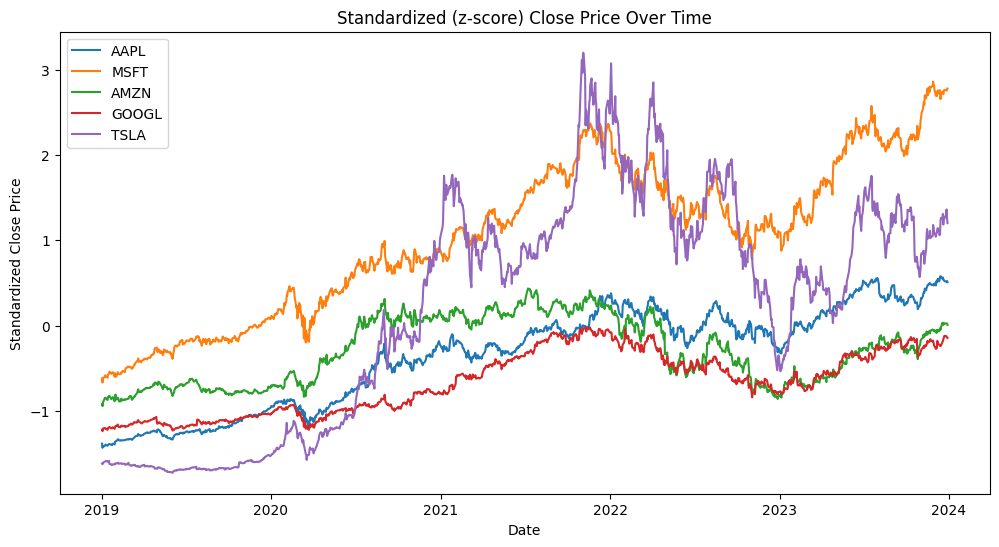

/tmp/ipython-input-1-1356969022.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticker', y='Close_z', data=df, palette='Set2')


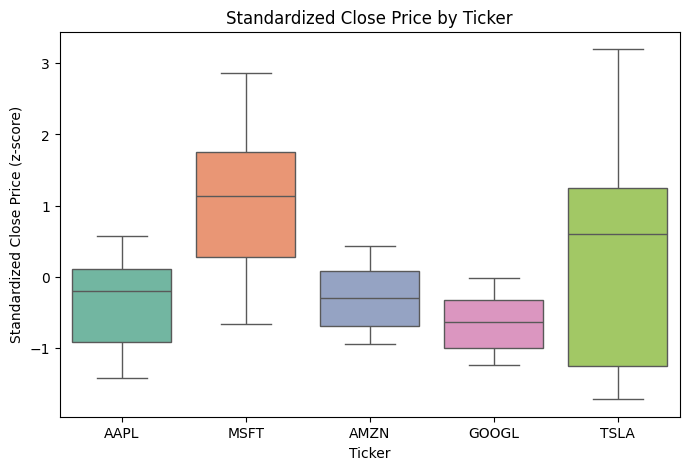

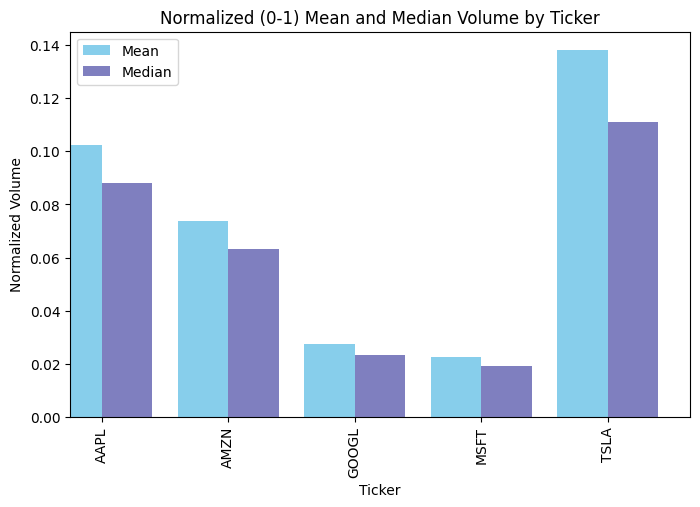

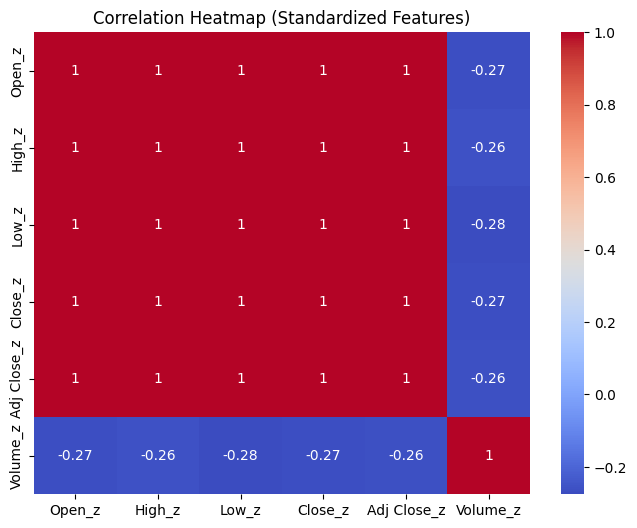

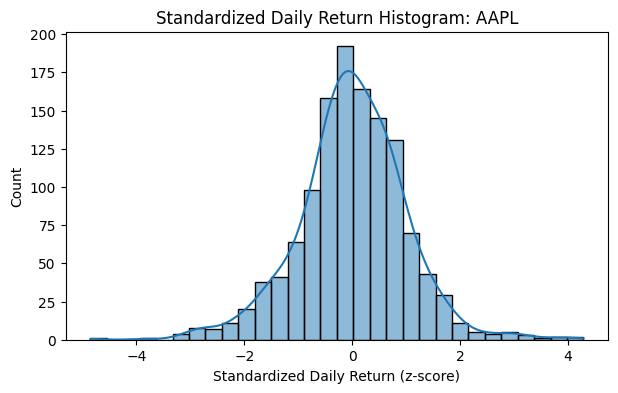

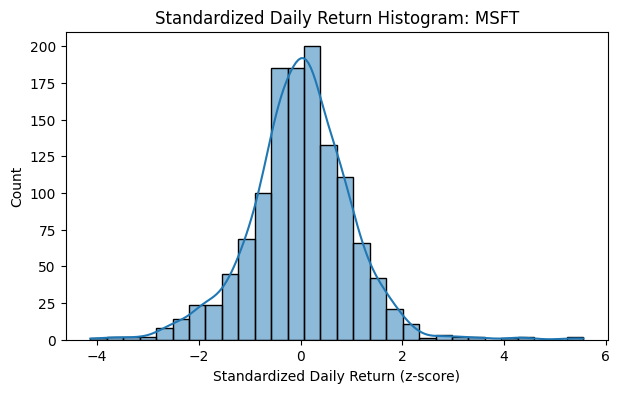

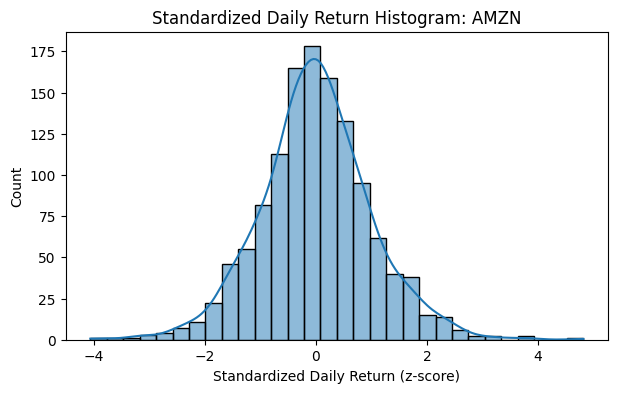

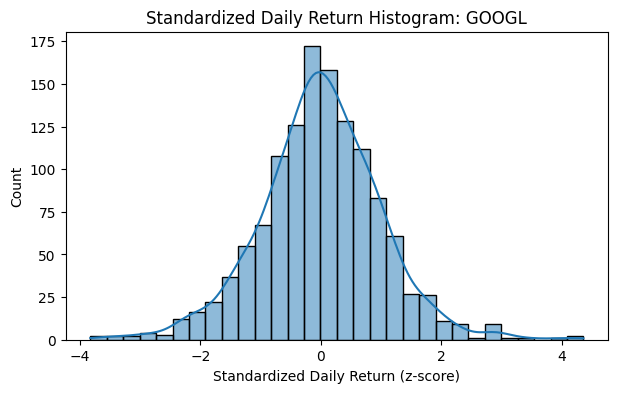

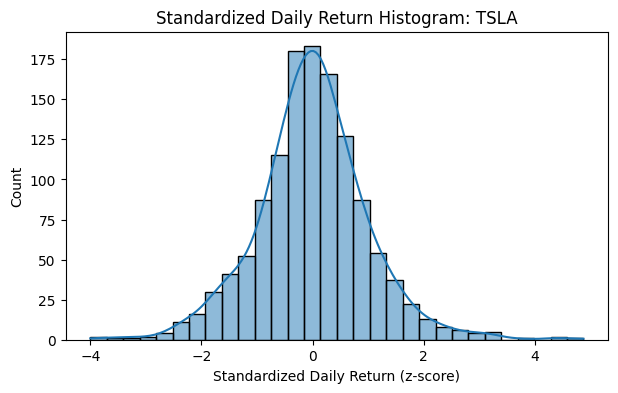

Record High and Low Close Price for Each Ticker:


,Ticker,Record High Date,Record High Close,Record Low Date,Record Low Close
0,AAPL,2023-12-14,198.11,2019-01-03,35.55
1,MSFT,2023-11-28,382.70,2019-01-03,97.40
2,AMZN,2021-07-08,186.57,2019-01-03,75.01
3,GOOGL,2021-11-18,149.84,2019-01-03,51.27
4,TSLA,2021-11-04,409.97,2019-06-03,11.93


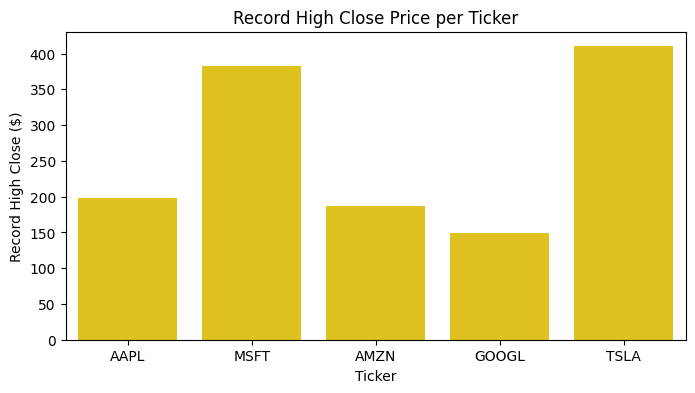

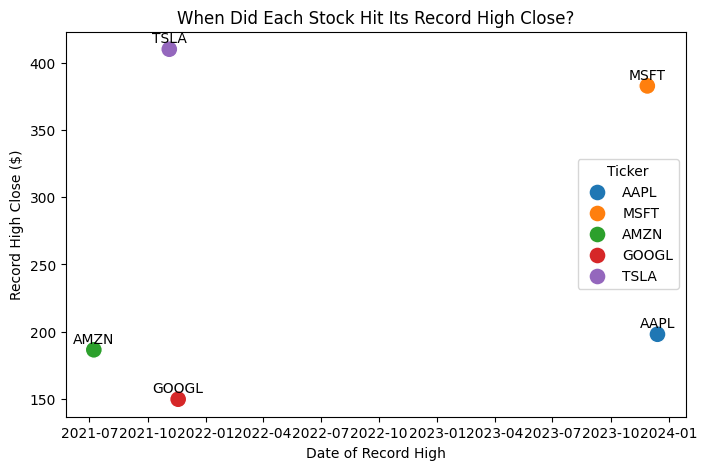

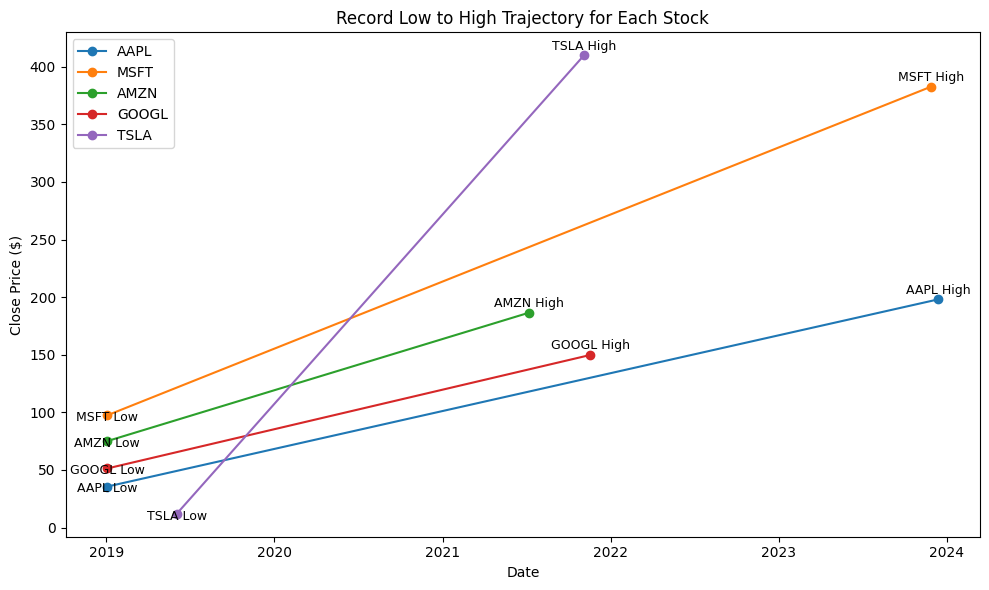

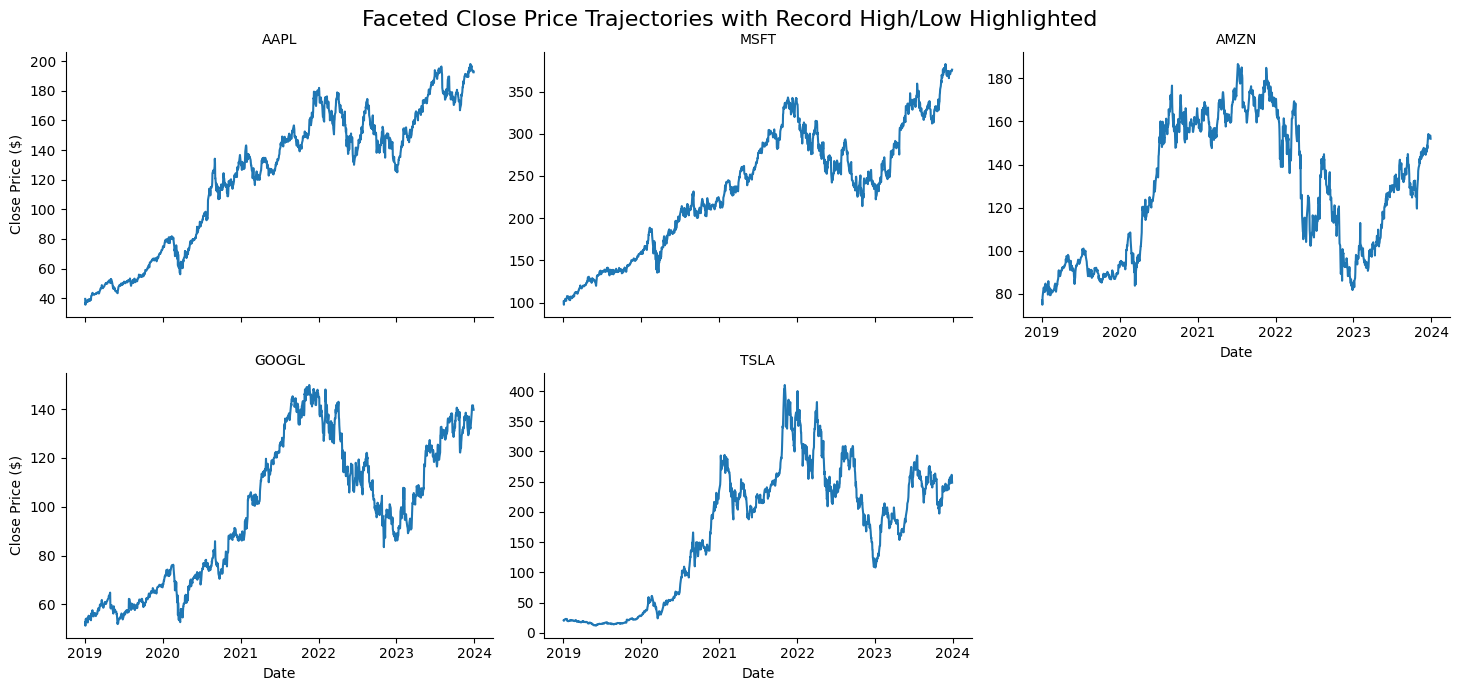

Biggest daily percent gain/drop per ticker (%):


,Ticker,Record Gain Date,Max Gain (%),Record Drop Date,Max Drop (%)
0,AAPL,2022-02-24,6.66,2020-03-20,-7.26
1,MSFT,2022-02-24,8.10,2020-03-20,-5.92
2,AMZN,2022-02-24,8.24,2022-11-01,-6.92
3,GOOGL,2022-11-30,6.51,2020-03-20,-5.54
4,TSLA,2020-02-03,15.78,2021-11-09,-12.79


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Introduce the data
print("="*50)
print("DATASET INTRODUCTION")
print("="*50)
print(
    "• Source: Yahoo Finance via yfinance Python library\n"
    "• Companies: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google (GOOGL), Tesla (TSLA)\n"
    "• Time Span: 2019-01-01 to 2024-01-01\n"
    "• Features: Date, Open, High, Low, Close, Adj Close, Volume, Ticker"
)

# Load data
file_path = '/content/drive/MyDrive/tech-stock-2019-2024 - tech-stock-2019-2024.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#Concise summary stats table
concise_stats = df[numeric_cols + ['Ticker']].groupby('Ticker').agg(['mean', 'std', 'min', 'max']).round(2)
print("\nConcise summary stats for each Ticker:")
display(concise_stats)

#Data normalization and standardization
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
for col in numeric_cols:
    df[f'{col}_z'] = scaler_std.fit_transform(df[[col]])
    df[f'{col}_mm'] = scaler_minmax.fit_transform(df[[col]])

# 4. Line plot of Close price vs. Date for each Ticker (z-score)
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close_z'], label=ticker)
plt.title("Standardized (z-score) Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Standardized Close Price")
plt.legend()
plt.show()

#Boxplots for Close price by Ticker (z-score)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ticker', y='Close_z', data=df, palette='Set2')
plt.title("Standardized Close Price by Ticker")
plt.ylabel("Standardized Close Price (z-score)")
plt.show()

# chart: mean/median volume by Ticker (normalized)
mean_vol = df.groupby('Ticker')['Volume_mm'].mean()
median_vol = df.groupby('Ticker')['Volume_mm'].median()
plt.figure(figsize=(8, 5))
mean_vol.plot(kind='bar', color='skyblue', width=0.4, position=1, label='Mean')
median_vol.plot(kind='bar', color='navy', width=0.4, position=0, alpha=0.5, label='Median')
plt.title("Normalized (0-1) Mean and Median Volume by Ticker")
plt.ylabel("Normalized Volume")
plt.legend()
plt.show()

#Heatmap of correlations (standardized)
zscore_cols = [f"{col}_z" for col in numeric_cols]
plt.figure(figsize=(8,6))
corr = df[zscore_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Standardized Features)")
plt.show()

#Histogram of daily returns (standardized per ticker)
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker].copy()
    subset['Return'] = (subset['Close'] - subset['Open']) / subset['Open']
    subset['Return_z'] = (subset['Return'] - subset['Return'].mean()) / subset['Return'].std()
    plt.figure(figsize=(7,4))
    sns.histplot(subset['Return_z'], bins=30, kde=True, color='C0')
    plt.title(f"Standardized Daily Return Histogram: {ticker}")
    plt.xlabel("Standardized Daily Return (z-score)")
    plt.show()

# Table of record highs/lows by Ticker
records = []
for ticker in df['Ticker'].unique():
    dft = df[df['Ticker'] == ticker]
    high_row = dft.loc[dft['Close'].idxmax()]
    low_row = dft.loc[dft['Close'].idxmin()]
    records.append([
        ticker,
        high_row['Date'].strftime("%Y-%m-%d"),
        round(high_row['Close'],2),
        low_row['Date'].strftime("%Y-%m-%d"),
        round(low_row['Close'],2)
    ])

records_df = pd.DataFrame(records, columns=['Ticker', 'Record High Date', 'Record High Close',
                                            'Record Low Date', 'Record Low Close'])
print("Record High and Low Close Price for Each Ticker:")
display(records_df)

#Ticker vs Record High Close (bar plot)
plt.figure(figsize=(8,4))
sns.barplot(x='Ticker', y='Record High Close', data=records_df, color='gold')
plt.title("Record High Close Price per Ticker")
plt.ylabel("Record High Close ($)")
plt.xlabel("Ticker")
plt.show()

# 11. Record High Date vs Record High Close (scatter plot)
records_df['Record High Date'] = pd.to_datetime(records_df['Record High Date'])
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Record High Date',
    y='Record High Close',
    data=records_df,
    hue='Ticker',
    s=150
)
for i, row in records_df.iterrows():
    plt.text(row['Record High Date'], row['Record High Close']+5, row['Ticker'], fontsize=10, ha='center')
plt.title("When Did Each Stock Hit Its Record High Close?")
plt.xlabel("Date of Record High")
plt.ylabel("Record High Close ($)")
plt.show()

# 12. Low-to-High Timeline Plot for Each Ticker
plt.figure(figsize=(10,6))
for i, row in records_df.iterrows():
    plt.plot([pd.to_datetime(row['Record Low Date']), row['Record High Date']],
             [row['Record Low Close'], row['Record High Close']],
             marker='o', label=row['Ticker'])
    plt.text(pd.to_datetime(row['Record Low Date']), row['Record Low Close']-5, f"{row['Ticker']} Low", ha='center', fontsize=9)
    plt.text(row['Record High Date'], row['Record High Close']+5, f"{row['Ticker']} High", ha='center', fontsize=9)
plt.title("Record Low to High Trajectory for Each Stock")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

#FacetGrid for Highs and Lows: Each Company's Close Series
df['is_high'] = False
df['is_low'] = False
for i, row in records_df.iterrows():
    df.loc[(df['Ticker']==row['Ticker']) & (df['Close']==row['Record High Close']), 'is_high'] = True
    df.loc[(df['Ticker']==row['Ticker']) & (df['Close']==row['Record Low Close']), 'is_low'] = True

g = sns.FacetGrid(df, col='Ticker', col_wrap=3, height=3.5, aspect=1.4, sharey=False)
g.map_dataframe(sns.lineplot, x='Date', y='Close')
g.map_dataframe(sns.scatterplot, x='Date', y='Close', hue='is_high', size='is_high',
                sizes={False: 0, True: 200}, palette={True: 'red', False: 'none'}, legend=False)
g.map_dataframe(sns.scatterplot, x='Date', y='Close', hue='is_low', size='is_low',
                sizes={False: 0, True: 200}, palette={True: 'blue', False: 'none'}, legend=False)
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Close Price ($)")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Faceted Close Price Trajectories with Record High/Low Highlighted", fontsize=16)
plt.show()

#Extreme day percent changes: Biggest daily % gain/loss per ticker
records_vol = []
for ticker in df['Ticker'].unique():
    sub = df[df['Ticker'] == ticker].copy()
    sub['Return'] = (sub['Close'] - sub['Open']) / sub['Open']
    max_gain = sub.loc[sub['Return'].idxmax()]
    max_drop = sub.loc[sub['Return'].idxmin()]
    records_vol.append([
        ticker,
        max_gain['Date'].strftime("%Y-%m-%d"),
        round(100*max_gain['Return'],2),
        max_drop['Date'].strftime("%Y-%m-%d"),
        round(100*max_drop['Return'],2)
    ])
records_vol_df = pd.DataFrame(
    records_vol,
    columns=['Ticker', 'Record Gain Date', 'Max Gain (%)', 'Record Drop Date', 'Max Drop (%)'])
print("Biggest daily percent gain/drop per ticker (%):")
display(records_vol_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Event rows for modeling: 97

========== AAPL Event Returns: Linear Regression OLS ==========
OLS | MAE: 0.1030, RMSE: 0.1165, R²: -0.439

Top 10 Most Volatile Event Days (AAPL) [OLS]:
 EventDate  Actual_Return  Predicted_OLS
2020-03-16        -12.865         -3.298
2020-03-13         11.981         17.619
2020-07-31         10.469         16.899
2020-03-24         10.033          4.425
2020-03-12         -9.875          2.375
2020-03-02          9.310          1.612
2022-11-10          8.897          2.465
2020-04-06          8.724         32.723
2020-09-03         -8.006          7.181
2020-03-09         -7.909          2.237


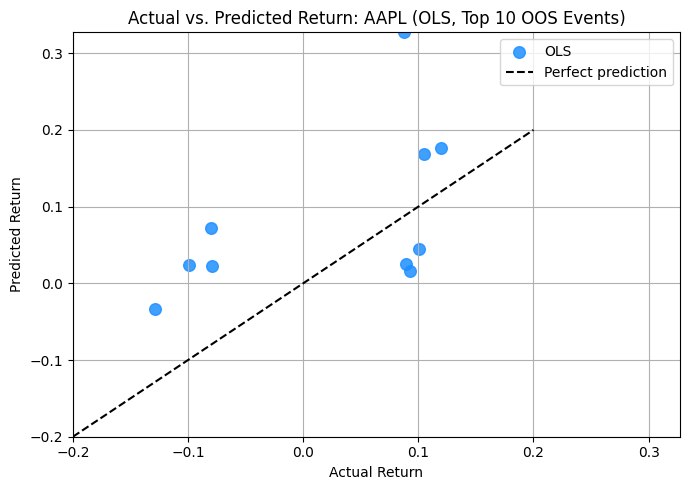


Confusion Matrix (OLS):
[[1 3]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.67      1.00      0.80         6

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



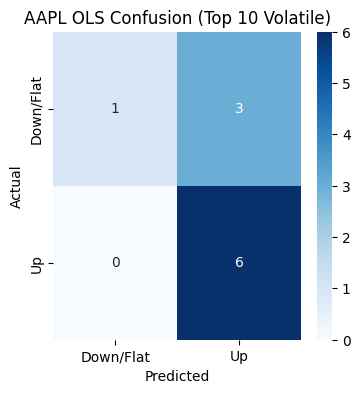


========== AMZN Event Returns: Linear Regression OLS ==========
OLS | MAE: 0.0925, RMSE: 0.1049, R²: -0.084

Top 10 Most Volatile Event Days (AMZN) [OLS]:
 EventDate  Actual_Return  Predicted_OLS
2022-04-29        -14.049        -23.259
2022-02-04         13.536         16.308
2022-11-10         12.178         -1.416
2022-07-29         10.361         -8.771
2023-02-03         -8.431         -4.181
2023-08-04          8.269          2.964
2020-07-20          7.930         -4.091
2020-03-12         -7.922          4.391
2022-02-03         -7.813        -17.862
2020-05-01         -7.597         -3.782


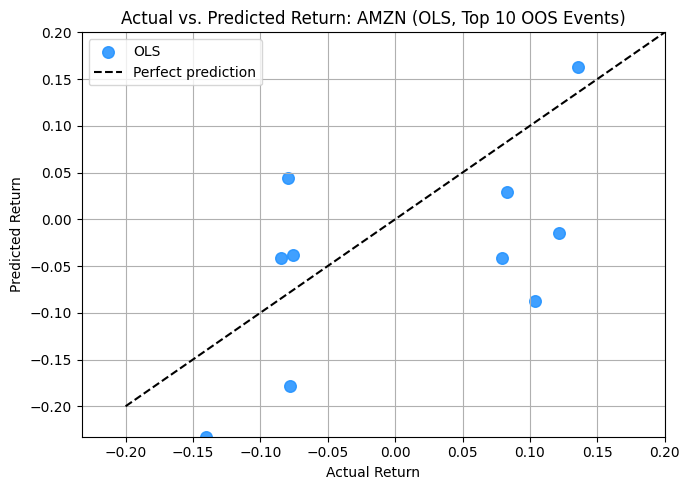


Confusion Matrix (OLS):
[[4 1]
 [3 2]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



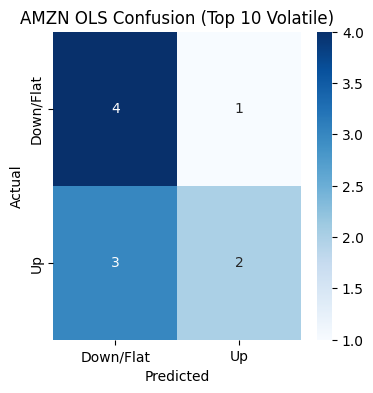


========== GOOGL Event Returns: Linear Regression OLS ==========
OLS | MAE: 0.0911, RMSE: 0.1062, R²: -0.377

Top 10 Most Volatile Event Days (GOOGL) [OLS]:
 EventDate  Actual_Return  Predicted_OLS
2020-03-16        -11.634          1.933
2019-07-26          9.620         -2.083
2023-10-25         -9.509        -13.906
2020-03-13          9.241          0.620
2022-10-26         -9.141         -6.656
2020-04-29          8.891         12.948
2020-04-06          8.281         19.430
2020-03-12         -8.205          0.700
2023-02-08         -7.683         13.900
2022-07-27          7.656          3.057


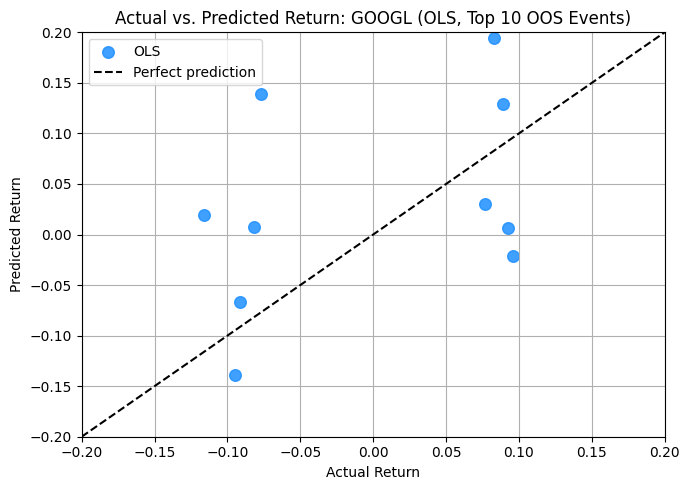


Confusion Matrix (OLS):
[[2 3]
 [1 4]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



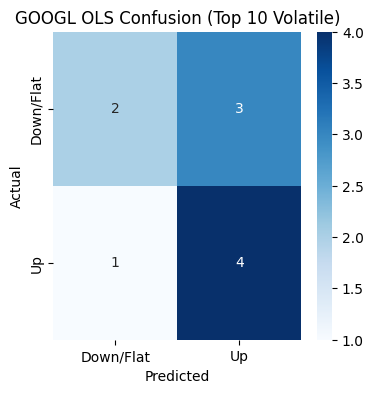


========== MSFT Event Returns: Linear Regression OLS ==========
OLS | MAE: 0.4935, RMSE: 0.5458, R²: -31.364

Top 10 Most Volatile Event Days (MSFT) [OLS]:
 EventDate  Actual_Return  Predicted_OLS
2020-03-16        -14.739        -92.016
2020-03-13         14.217         22.549
2020-03-12         -9.484        -93.401
2020-03-24          9.090        -24.950
2020-03-17          8.234        -40.077
2022-11-10          8.227         59.666
2022-10-26         -7.716        -30.610
2020-04-06          7.437         47.418
2023-04-26          7.243        -43.391
2020-02-27         -7.046        -83.728


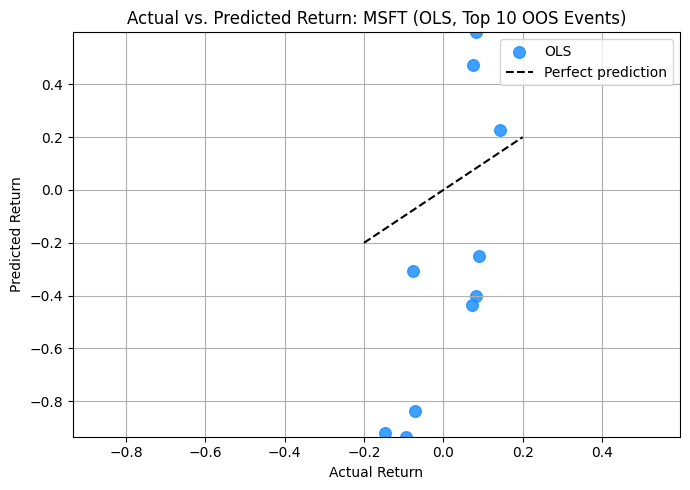


Confusion Matrix (OLS):
[[4 0]
 [3 3]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.50      0.67         6

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



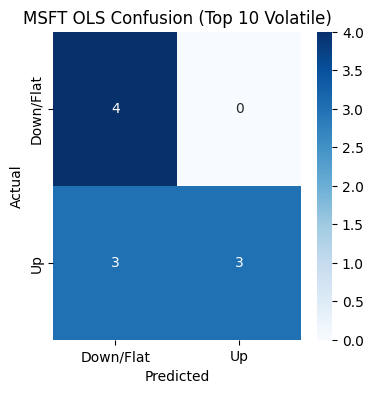


========== TSLA Event Returns: Linear Regression OLS ==========
OLS | MAE: 0.1634, RMSE: 0.1951, R²: -0.220

Top 10 Most Volatile Event Days (TSLA) [OLS]:
 EventDate  Actual_Return  Predicted_OLS
2020-09-08        -21.063          5.922
2020-02-03         19.895          9.970
2021-03-09         19.641        -20.802
2020-03-16        -18.578        -10.227
2020-03-19         18.388         -2.289
2019-10-24         17.669         16.684
2020-02-05        -17.176          2.225
2020-03-24         16.282          0.343
2020-03-18        -16.034         -5.551
2020-02-04         13.726          3.509


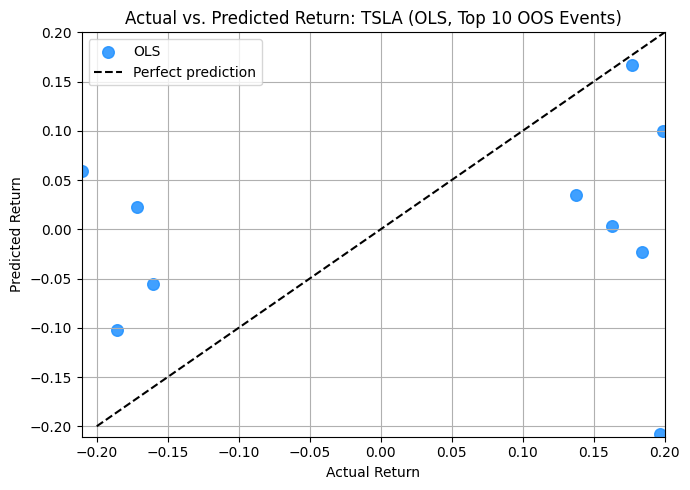


Confusion Matrix (OLS):
[[2 2]
 [2 4]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



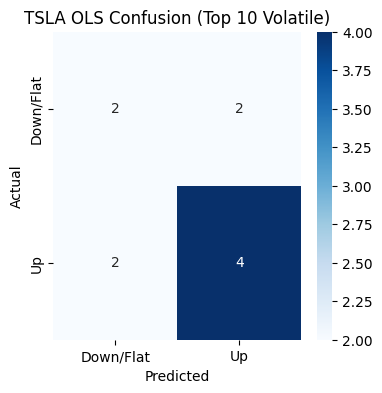


======== Per-Ticker OLS Modeling Complete ========


In [2]:
# ========== DEPENDENCY INSTALLS ==========
!pip install ta --quiet
!pip install scikit-learn --quiet
!pip install seaborn matplotlib --quiet
!pip install torch transformers --quiet

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import ta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ========== DATA PATHS ==========
news_csv_path = '/content/drive/MyDrive/sample_news  - Sheet1.csv'
price_csv_path = '/content/drive/MyDrive/tech-stock-2019-2024 - tech-stock-2019-2024.csv'

df_news = pd.read_csv(news_csv_path)
df_news.columns = [col.strip() for col in df_news.columns]
df_news['EventDate'] = pd.to_datetime(df_news['EventDate'])
df_news['PublishDate'] = pd.to_datetime(df_news['PublishDate'])

df = pd.read_csv(price_csv_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Ticker', 'Date'])

# ========== FEATURE ENGINEERING ==========
def add_tech_indicators(df):
    results = []
    for ticker in df['Ticker'].unique():
        stock_df = df[df['Ticker'] == ticker].copy().sort_values('Date')
        stock_df['SMA_14'] = ta.trend.sma_indicator(stock_df['Close'], window=14)
        stock_df['EMA_14'] = ta.trend.ema_indicator(stock_df['Close'], window=14)
        stock_df['MACD'] = ta.trend.macd(stock_df['Close'])
        stock_df['RSI_14'] = ta.momentum.rsi(stock_df['Close'], window=14)
        stock_df['ROC_10'] = ta.momentum.roc(stock_df['Close'], window=10)
        stock_df['STOCHk'] = ta.momentum.stoch(stock_df['High'], stock_df['Low'], stock_df['Close'])
        bb = ta.volatility.BollingerBands(close=stock_df['Close'], window=20, window_dev=2)
        stock_df['BB_width'] = bb.bollinger_hband() - bb.bollinger_lband()
        stock_df['ATR_14'] = ta.volatility.average_true_range(stock_df['High'], stock_df['Low'], stock_df['Close'], window=14)
        stock_df['OBV'] = ta.volume.on_balance_volume(stock_df['Close'], stock_df['Volume'])
        stock_df = stock_df.reset_index(drop=True)
        results.append(stock_df)
    df_ind = pd.concat(results).sort_values(['Ticker', 'Date']).reset_index(drop=True)
    return df_ind

df_indicators = add_tech_indicators(df)
df_indicators['Return'] = df_indicators.groupby('Ticker')['Close'].pct_change()

# ========== FINBERT SENTIMENT ==========
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
fbert_model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
def finbert_sentiment_score(headlines):
    scores = []
    for text in headlines:
        inputs = tokenizer(str(text), return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            logits = fbert_model(**inputs).logits.detach().numpy()[0]
        score = np.argmax(logits)
        scores.append({0: -1, 1: 0, 2: 1}[score])
    return np.mean(scores) if scores else 0.0

event_rows = []
for (ticker, event_date), grouped in df_news.groupby(['Ticker', 'EventDate']):
    price_row = df_indicators[(df_indicators['Ticker'] == ticker) & (df_indicators['Date'] == event_date)]
    if price_row.empty:
        continue
    row = price_row.iloc[0].to_dict()
    row['Ticker'] = ticker
    row['EventDate'] = event_date
    headlines = list(grouped['Headline'])
    row['Sentiment'] = finbert_sentiment_score(headlines)
    row['HeadlineCount'] = len(headlines)
    event_rows.append(row)
event_sentiment_df = pd.DataFrame(event_rows)

features = [
    'SMA_14', 'EMA_14', 'MACD', 'RSI_14', 'ROC_10', 'STOCHk', 'BB_width',
    'ATR_14', 'OBV', 'Sentiment', 'HeadlineCount'
]
target = 'Return'

df_all = event_sentiment_df.dropna(subset=features + [target]).reset_index(drop=True)
print(f"\nEvent rows for modeling: {len(df_all)}")
tickers_list = df_all['Ticker'].unique()

# ========== OLS MODEL PER TICKER (Top 10 Most Volatile for Small N, else 20) ==========
# ... [SAME CODE as above, up to the for ticker in tickers_list loop] ...

for ticker in tickers_list:
    sub = df_all[df_all['Ticker'] == ticker].reset_index(drop=True)
    n_events = len(sub)
    if n_events < 10:
        print(f"{ticker}: Too few events for modeling (n={n_events}).")
        continue
    N_OOS = min(20, max(10, n_events // 2))
    X = sub[features].values
    y = sub[target].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    abs_y = np.abs(y)
    test_idx = abs_y.argsort()[-N_OOS:]
    train_idx = np.setdiff1d(np.arange(n_events), test_idx)
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    event_dates_test = sub['EventDate'].values[test_idx]

    # ----- Fit Linear Regression -----
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n========== {ticker} Event Returns: Linear Regression OLS ==========")
    print(f"OLS | MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.3f}")


    result_table = pd.DataFrame({
        'EventDate': event_dates_test,
        'Actual_Return': y_test * 100,
        'Predicted_OLS': y_pred * 100
    }).sort_values('Actual_Return', key=np.abs, ascending=False)
    print(f"\nTop {N_OOS} Most Volatile Event Days ({ticker}) [OLS]:")
    print(result_table.to_string(index=False, float_format='%.3f'))

    # ======== ACTUAL vs. PREDICTED SCATTER WITH DIAGONAL ========
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred, color='dodgerblue', marker='o', s=70, alpha=0.85, label="OLS")
    plt.plot([-0.2, 0.2], [-0.2, 0.2], 'k--', lw=1.5, label='Perfect prediction')
    plt.xlim(min(y_test.min(), y_pred.min(), -0.2), max(y_test.max(), y_pred.max(), 0.2))
    plt.ylim(min(y_test.min(), y_pred.min(), -0.2), max(y_test.max(), y_pred.max(), 0.2))
    plt.xlabel('Actual Return')
    plt.ylabel('Predicted Return')
    plt.title(f'Actual vs. Predicted Return: {ticker} (OLS, Top {N_OOS} OOS Events)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --------- Directional Accuracy / Confusion Matrix ----------
    sign_actual = (y_test > 0).astype(int)
    sign_pred = (y_pred > 0).astype(int)
    cm = confusion_matrix(sign_actual, sign_pred, labels=[0,1])
    print(f"\nConfusion Matrix (OLS):")
    print(cm)
    print(classification_report(sign_actual, sign_pred, digits=2))
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Down/Flat","Up"], yticklabels=["Down/Flat","Up"])
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.title(f'{ticker} OLS Confusion (Top {N_OOS} Volatile)')
    plt.show()

print("\n======== Per-Ticker OLS Modeling Complete ========")

In [ ]:
!pip install numpy==1.26.4 --force-reinstall
import os
os.kill(os.getpid(), 9)  # Forces the Colab runtime to restart so new numpy is active

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

========== AAPL Event Returns: Model Metrics ==========
Random Forest   | MAE: 0.0193, RMSE: 0.0239, R²: 0.922
XGBoost         | MAE: 0.0026, RMSE: 0.0034, R²: 0.998
Ridge           | MAE: 0.0386, RMSE: 0.0477, R²: 0.688
Ensemble        | MAE: 0.0160, RMSE: 0.0215, R²: 0.937


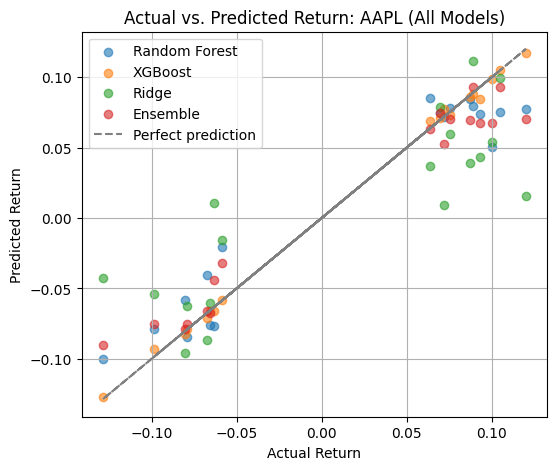


Top 10 Most Volatile Event Days (AAPL) - Actual vs. Predicted (% Change):
 EventDate  Actual_Return  Predicted_Return
2020-03-16        -12.865            -8.989
2020-03-13         11.981             7.002
2020-07-31         10.469             9.311
2020-03-24         10.033             6.765
2020-03-12         -9.875            -7.531
2020-03-02          9.310             6.719
2022-11-10          8.897             9.286
2020-04-06          8.724             6.970
2020-09-03         -8.006            -7.872
2020-03-09         -7.909            -7.552

Confusion Matrix for AAPL (by sign, Ensemble):
 [[ 8  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



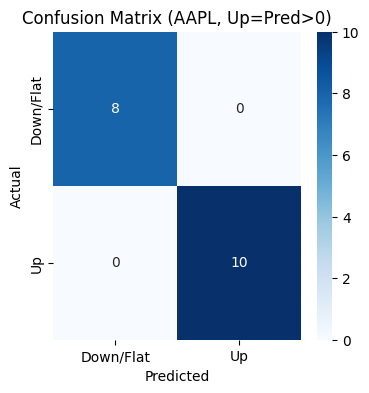


========== AMZN Event Returns: Model Metrics ==========
Random Forest   | MAE: 0.0262, RMSE: 0.0350, R²: 0.840
XGBoost         | MAE: 0.0023, RMSE: 0.0032, R²: 0.999
Ridge           | MAE: 0.0358, RMSE: 0.0411, R²: 0.779
Ensemble        | MAE: 0.0198, RMSE: 0.0233, R²: 0.929


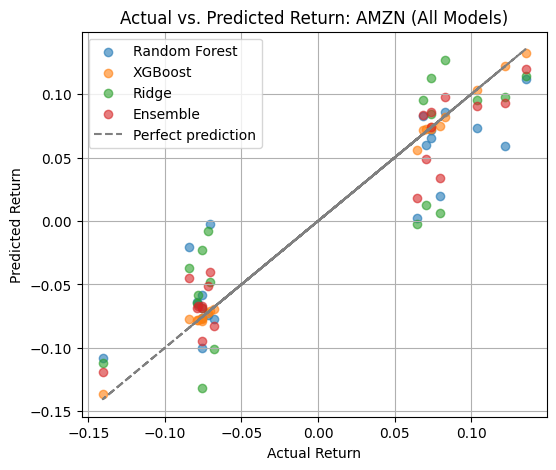


Top 10 Most Volatile Event Days (AMZN) - Actual vs. Predicted (% Change):
 EventDate  Actual_Return  Predicted_Return
2022-04-29        -14.049           -11.878
2022-02-04         13.536            11.951
2022-11-10         12.178             9.278
2022-07-29         10.361             9.065
2023-02-03         -8.431            -4.518
2023-08-04          8.269             9.798
2020-07-20          7.930             3.366
2020-03-12         -7.922            -6.882
2022-02-03         -7.813            -6.726
2020-05-01         -7.597            -6.860

Confusion Matrix for AMZN (by sign, Ensemble):
 [[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



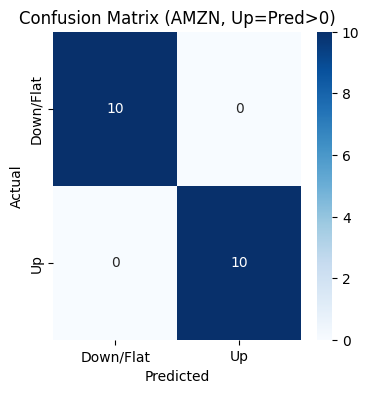


========== GOOGL Event Returns: Model Metrics ==========
Random Forest   | MAE: 0.0157, RMSE: 0.0229, R²: 0.917
XGBoost         | MAE: 0.0018, RMSE: 0.0023, R²: 0.999
Ridge           | MAE: 0.0272, RMSE: 0.0351, R²: 0.805
Ensemble        | MAE: 0.0131, RMSE: 0.0175, R²: 0.951


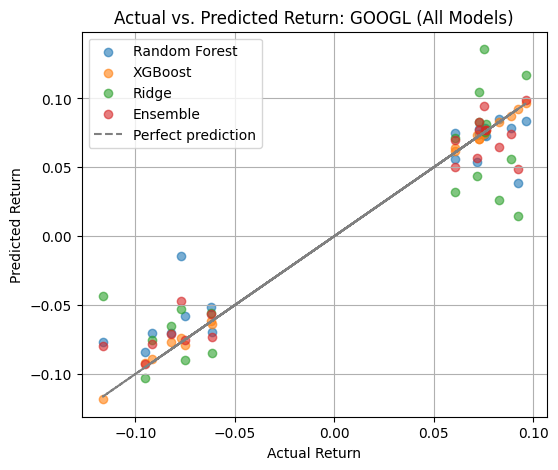


Top 10 Most Volatile Event Days (GOOGL) - Actual vs. Predicted (% Change):
 EventDate  Actual_Return  Predicted_Return
2020-03-16        -11.634            -7.948
2019-07-26          9.620             9.892
2023-10-25         -9.509            -9.295
2020-03-13          9.241             4.847
2022-10-26         -9.141            -7.838
2020-04-29          8.891             7.402
2020-04-06          8.281             6.470
2020-03-12         -8.205            -7.059
2023-02-08         -7.683            -4.687
2022-07-27          7.656             7.705

Confusion Matrix for GOOGL (by sign, Ensemble):
 [[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



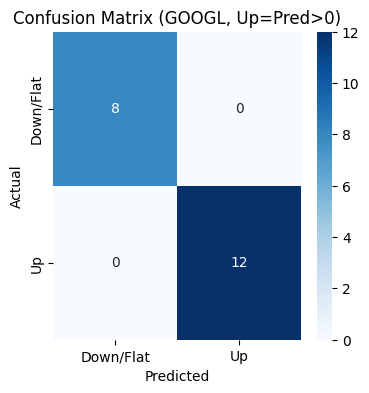


========== MSFT Event Returns: Model Metrics ==========
Random Forest   | MAE: 0.0182, RMSE: 0.0244, R²: 0.906
XGBoost         | MAE: 0.0024, RMSE: 0.0031, R²: 0.998
Ridge           | MAE: 0.0382, RMSE: 0.0477, R²: 0.639
Ensemble        | MAE: 0.0152, RMSE: 0.0208, R²: 0.932


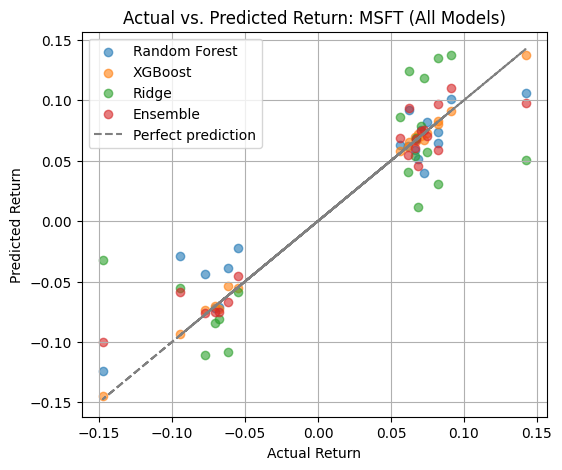


Top 10 Most Volatile Event Days (MSFT) - Actual vs. Predicted (% Change):
 EventDate  Actual_Return  Predicted_Return
2020-03-16        -14.739           -10.028
2020-03-13         14.217             9.795
2020-03-12         -9.484            -5.901
2020-03-24          9.090            10.995
2020-03-17          8.234             5.838
2022-11-10          8.227             9.725
2022-10-26         -7.716            -7.627
2020-04-06          7.437             7.062
2023-04-26          7.243             7.498
2020-02-27         -7.046            -7.559

Confusion Matrix for MSFT (by sign, Ensemble):
 [[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



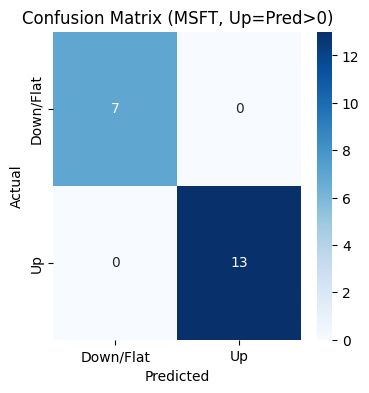


========== TSLA Event Returns: Model Metrics ==========
Random Forest   | MAE: 0.0654, RMSE: 0.0854, R²: 0.694
XGBoost         | MAE: 0.0025, RMSE: 0.0032, R²: 1.000
Ridge           | MAE: 0.0634, RMSE: 0.0837, R²: 0.706
Ensemble        | MAE: 0.0423, RMSE: 0.0540, R²: 0.878


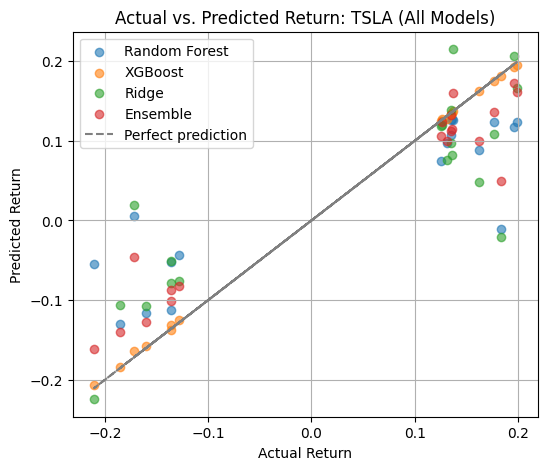


Top 10 Most Volatile Event Days (TSLA) - Actual vs. Predicted (% Change):
 EventDate  Actual_Return  Predicted_Return
2020-09-08        -21.063           -16.185
2020-02-03         19.895            16.173
2021-03-09         19.641            17.225
2020-03-16        -18.578           -14.034
2020-03-19         18.388             4.982
2019-10-24         17.669            13.596
2020-02-05        -17.176            -4.641
2020-03-24         16.282            10.016
2020-03-18        -16.034           -12.748
2020-02-04         13.726            15.974

Confusion Matrix for TSLA (by sign, Ensemble):
 [[ 7  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



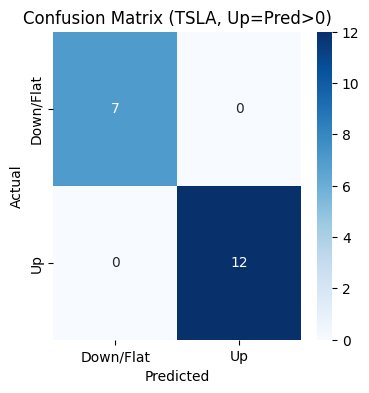


=== SHAP Feature Importance (Random Forest) ===


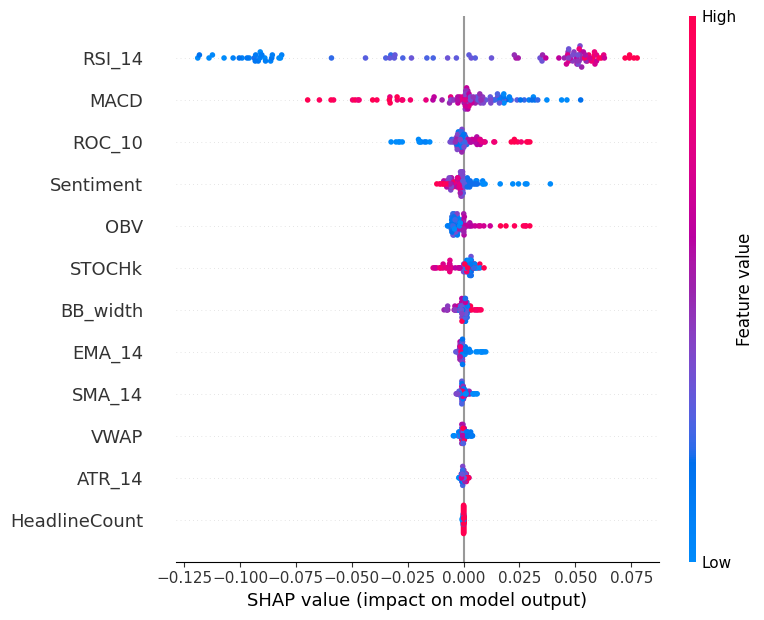

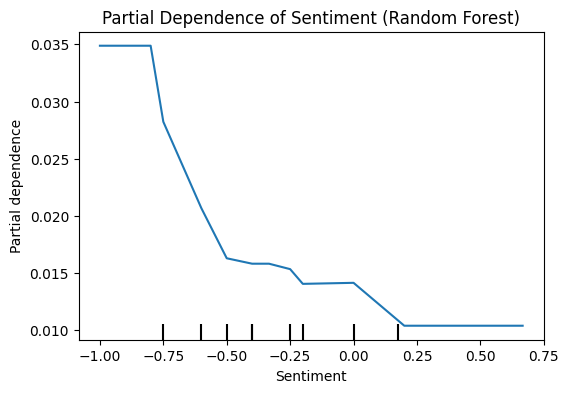

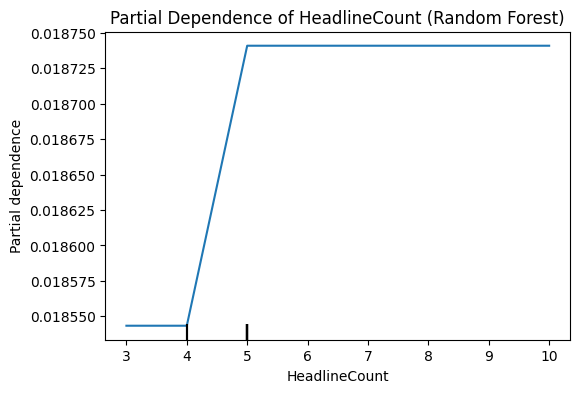


Done! 


In [3]:
# Install dependencies (including SHAP and XGBoost)
!pip install pandas-ta transformers torch seaborn xgboost shap --quiet

from google.colab import drive
drive.mount('/content/drive')

news_csv_path = '/content/drive/MyDrive/sample_news  - Sheet1.csv'

import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from xgboost import XGBRegressor
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# --- 1. LOAD and PREP NEWS DATA ---
df_news = pd.read_csv(news_csv_path)
df_news.columns = [col.strip() for col in df_news.columns]
df_news['EventDate'] = pd.to_datetime(df_news['EventDate'])
df_news['PublishDate'] = pd.to_datetime(df_news['PublishDate'])

# --- 2. FINBERT MODEL LOADING ---
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
def finbert_sentiment_score(headlines):
    scores = []
    for text in headlines:
        inputs = tokenizer(str(text), return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            logits = model(**inputs).logits.detach().numpy()[0]
        score = np.argmax(logits)
        scores.append({0: -1, 1: 0, 2: 1}[score])
    return np.mean(scores) if scores else 0.0

# --- 3. TECHNICAL INDICATORS ---
def add_tech_indicators(df):
    tickers = df['Ticker'].unique()
    results = []
    for ticker in tickers:
        stock_df = df[df['Ticker'] == ticker].copy().sort_values('Date')
        stock_df = stock_df.set_index('Date')
        stock_df['SMA_14'] = ta.sma(stock_df['Close'], length=14)
        stock_df['EMA_14'] = ta.ema(stock_df['Close'], length=14)
        stock_df['MACD'] = ta.macd(stock_df['Close'])['MACD_12_26_9']
        stock_df['RSI_14'] = ta.rsi(stock_df['Close'], length=14)
        stock_df['ROC_10'] = ta.roc(stock_df['Close'], length=10)
        stock_df['STOCHk'] = ta.stoch(stock_df['High'], stock_df['Low'], stock_df['Close'])['STOCHk_14_3_3']
        bbands = ta.bbands(stock_df['Close'], length=20, std=2)
        stock_df['BB_width'] = bbands['BBU_20_2.0'] - bbands['BBL_20_2.0']
        stock_df['ATR_14'] = ta.atr(stock_df['High'], stock_df['Low'], stock_df['Close'], length=14)
        stock_df['OBV'] = ta.obv(stock_df['Close'], stock_df['Volume'])
        stock_df['VWAP'] = ta.vwap(stock_df['High'], stock_df['Low'], stock_df['Close'], stock_df['Volume'])
        stock_df = stock_df.reset_index()
        results.append(stock_df)
    df_ind = pd.concat(results).sort_values(['Ticker', 'Date']).reset_index(drop=True)
    return df_ind

# --- 4. CALCULATE TECHNICALS ON YOUR PRICE DATA ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Ticker', 'Date'])
df_indicators = add_tech_indicators(df)
df_indicators['Return'] = df_indicators.groupby('Ticker')['Close'].pct_change()

# --- 5. AGGREGATE SENTIMENT (30-day sliding window, strictly before each event_day) ---
lookback_days = 30  # Only headlines from event_date - 30, up to but not including event_date
event_rows = []
for (ticker, event_date), grouped in df_news.groupby(['Ticker', 'EventDate']):
    window = grouped[
        (grouped['PublishDate'] < event_date) &  # Strict: up to but NOT including the event day
        (grouped['PublishDate'] >= event_date - pd.Timedelta(days=lookback_days))
    ]
    headlines = list(window['Headline'])
    sentiment = finbert_sentiment_score(headlines)
    price_row = df_indicators[(df_indicators['Ticker'] == ticker) & (df_indicators['Date'] == event_date)]
    if price_row.empty:
        continue
    row = price_row.iloc[0].to_dict()
    row['Ticker'] = ticker
    row['EventDate'] = event_date
    row['Sentiment'] = sentiment
    row['HeadlineCount'] = len(headlines)
    event_rows.append(row)

event_sentiment_df = pd.DataFrame(event_rows)

# --- 6. Select features and target ---
features = [
    'SMA_14','EMA_14','MACD','RSI_14','ROC_10','STOCHk','BB_width',
    'ATR_14','OBV','VWAP','Sentiment','HeadlineCount'
]
target = 'Return'
to_keep = features + [target]
event_sentiment_df_clean = event_sentiment_df.dropna(subset=to_keep).reset_index(drop=True)
X_all = event_sentiment_df_clean[features].copy()
y_all = event_sentiment_df_clean[target].copy()
event_sentiment_df = event_sentiment_df_clean.copy()

# --- 7. Prepare design/Xy matrices (dropna for features + target) ---
X_all = event_sentiment_df[features].copy()
y_all = event_sentiment_df[target].copy()

# --- 8. ADVANCED MODELING: TimeSeriesSplit cross-validation + Hyperparameter Tuning + Ensemble ---
tscv = TimeSeriesSplit(n_splits=5, test_size=14)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 3, 5],
}
rf_gs = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
rf_gs.fit(X_all, y_all)
rf_best = rf_gs.best_estimator_

xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb.fit(X_all, y_all)

ridge = Ridge(alpha=1.0)
ridge.fit(X_all, y_all)

ensemble = VotingRegressor(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb),
        ('ridge', ridge)
    ]
)
ensemble.fit(X_all, y_all)

# --- 9. Out-of-sample, rolling-event prediction for each model and ensemble ---
event_sentiment_df['RF_Pred'] = rf_best.predict(X_all)
event_sentiment_df['XGB_Pred'] = xgb.predict(X_all)
event_sentiment_df['Ridge_Pred'] = ridge.predict(X_all)
event_sentiment_df['Ensemble_Pred'] = ensemble.predict(X_all)

for ticker in event_sentiment_df['Ticker'].unique():
    sub = event_sentiment_df[event_sentiment_df['Ticker'] == ticker].copy().reset_index(drop=True)
    actual = sub['Return']
    preds = {
        'Random Forest': sub['RF_Pred'],
        'XGBoost': sub['XGB_Pred'],
        'Ridge': sub['Ridge_Pred'],
        'Ensemble': sub['Ensemble_Pred'],
    }
    print(f"\n{'='*10} {ticker} Event Returns: Model Metrics {'='*10}")
    for modelname, pred in preds.items():
        mae = mean_absolute_error(actual, pred)
        rmse = np.sqrt(mean_squared_error(actual, pred))
        r2 = r2_score(actual, pred)
        print(f"{modelname:15s} | MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.3f}")

    plt.figure(figsize=(6,5))
    for modelname, pred in preds.items():
        plt.scatter(actual, pred, alpha=0.6, label=modelname)
    plt.plot(actual, actual, color='gray', linestyle='--', label='Perfect prediction')
    plt.xlabel('Actual Return')
    plt.ylabel('Predicted Return')
    plt.title(f'Actual vs. Predicted Return: {ticker} (All Models)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Actual vs. Predicted Table for most volatile days (Top 10 by absolute return) ---
    sub['abs_return'] = sub['Return'].abs()
    most_volatile = sub.nlargest(10, 'abs_return')[['EventDate', 'Return', 'Ensemble_Pred']]
    most_volatile = most_volatile.rename(columns={
        'Return': 'Actual_Return',
        'Ensemble_Pred': 'Predicted_Return'
    })
    most_volatile['Actual_Return'] = most_volatile['Actual_Return'] * 100
    most_volatile['Predicted_Return'] = most_volatile['Predicted_Return'] * 100
    print(f"\nTop 10 Most Volatile Event Days ({ticker}) - Actual vs. Predicted (% Change):")
    print(most_volatile.to_string(index=False, float_format='%.3f'))

    # ---- Confusion Matrix and Classification Report (up/down, Ensemble model) ----
    sign_actual = (actual > 0).astype(int)
    sign_pred = (sub['Ensemble_Pred'] > 0).astype(int)
    cm = confusion_matrix(sign_actual, sign_pred, labels=[0,1])
    print(f"\nConfusion Matrix for {ticker} (by sign, Ensemble):\n", cm)
    print(classification_report(sign_actual, sign_pred, digits=2))
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down/Flat","Up"], yticklabels=["Down/Flat","Up"])
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.title(f'Confusion Matrix ({ticker}, Up=Pred>0)')
    plt.show()

# --- 11. SHAP feature importance for Random Forest (explainability) ---
print('\n=== SHAP Feature Importance (Random Forest) ===')
explainer = shap.Explainer(rf_best, X_all)
shap_values = explainer(X_all)
shap.summary_plot(shap_values, X_all, show=True)

# --- 12. Partial Dependence Plot for Sentiment and News Count ---
importances = pd.Series(rf_best.feature_importances_, index=features)
from sklearn.inspection import PartialDependenceDisplay
for feat in ['Sentiment', 'HeadlineCount']:
    if feat in X_all.columns:
        fig, ax = plt.subplots(figsize=(6,4))
        PartialDependenceDisplay.from_estimator(
            rf_best, X_all, [feat], ax=ax, grid_resolution=25
        )
        ax.set_title(f'Partial Dependence of {feat} (Random Forest)')
        plt.show()
print("\nDone! ")